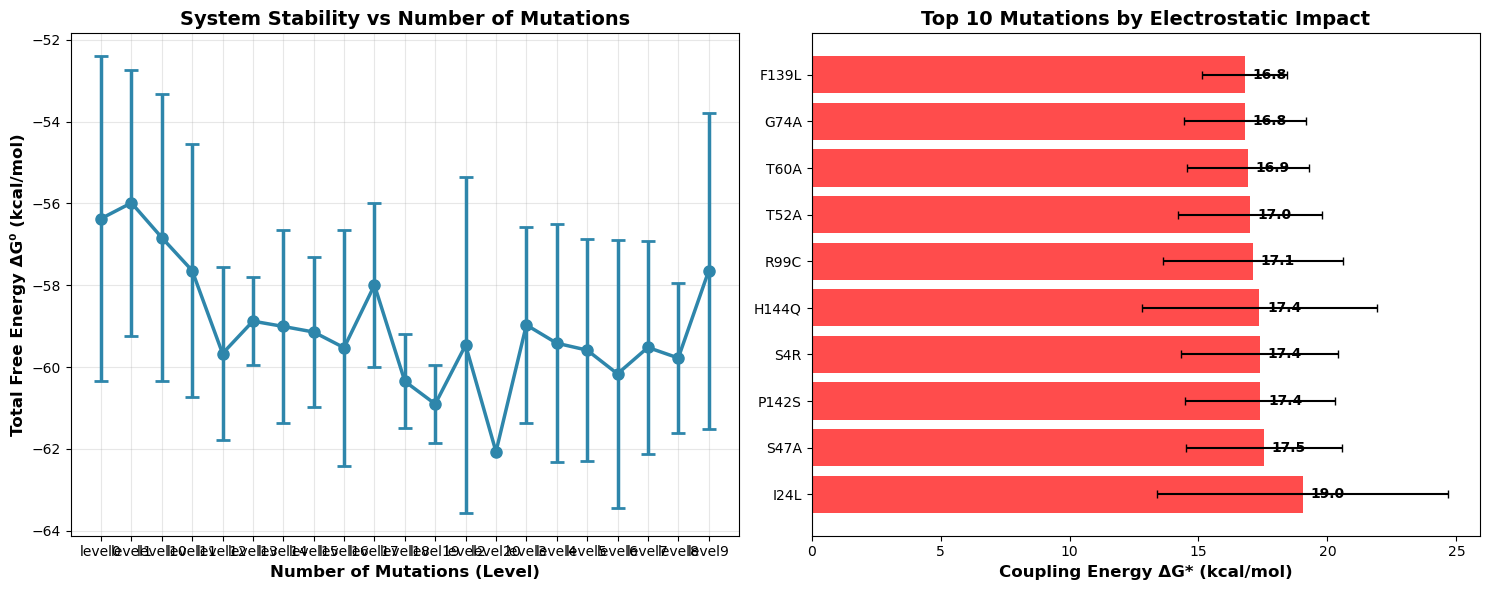

CLEAR INTERPRETATION OF RESULTS

📈 PLOT 1: System Stability vs Number of Mutations
   • Shows how the overall protein stability (ΔG⁰) changes
   • as we progressively add more mutations (Level 0 → Level 20)
   • Negative ΔG⁰ values mean STABLE protein
   • Positive ΔG⁰ values mean UNSTABLE protein
   • Trend shows if mutations have additive or cooperative effects

⚡ PLOT 2: Electrostatic Impact of Individual Mutations
   • Shows which specific mutations disrupt stability the most
   • ΔG* = electrostatic coupling energy between residues
   • RED bars: Destabilizing interactions (positive ΔG*)
   • BLUE bars: Stabilizing interactions (negative ΔG*)
   • Larger bars = stronger electrostatic interactions

🔑 KEY FINDINGS:
   • Average stability (ΔG⁰): -58.7 kcal/mol
   • Average coupling (ΔG*): 16.6 kcal/mol
   • Strongest mutation: I24L (ΔG* = 19.0 kcal/mol)
   • 💡 Your protein is generally STABLE (negative ΔG⁰)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean style
plt.style.use('default')
sns.set_palette("viridis")

# Load and clean data
df = pd.read_csv('/home/hp/nayanika/github/GPX6/analysis/mouse_data.csv')
df_clean = df.dropna(subset=['Mean_dG_star', 'Mean_dG0'])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PLOT 1: How stability changes as we add more mutations
# --------------------------------------------------------
level_stability = df_clean.groupby('Level').agg({
    'Mean_dG0': ['mean', 'std'],
    'Mean_dG_star': ['mean', 'std']
})

levels = sorted(df_clean['Level'].unique())
dG0_means = [level_stability.loc[level, ('Mean_dG0', 'mean')] for level in levels]
dG0_stds = [level_stability.loc[level, ('Mean_dG0', 'std')] for level in levels]

ax1.errorbar(levels, dG0_means, yerr=dG0_stds, 
             marker='o', markersize=8, capsize=5, capthick=2,
             linewidth=2.5, color='#2E86AB')
ax1.set_xlabel('Number of Mutations (Level)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Free Energy ΔG⁰ (kcal/mol)', fontsize=12, fontweight='bold')
ax1.set_title('System Stability vs Number of Mutations', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# PLOT 2: Electrostatic coupling strength of individual mutations
# ----------------------------------------------------------------
mutation_impact = df_clean.groupby('Mutation').agg({
    'Mean_dG_star': ['mean', 'std', 'count']
})
mutation_impact.columns = ['mean_dGstar', 'std_dGstar', 'count']

# Filter for well-measured mutations and get top 10 by impact
well_measured = mutation_impact[mutation_impact['count'] >= 3]
top_mutations = well_measured.sort_values('mean_dGstar', key=abs, ascending=False).head(10)

# Color based on stabilizing vs destabilizing
colors = ['red' if x > 0 else 'blue' for x in top_mutations['mean_dGstar']]

bars = ax2.barh(range(len(top_mutations)), top_mutations['mean_dGstar'],
                xerr=top_mutations['std_dGstar'], capsize=3,
                color=colors, alpha=0.7)

ax2.set_yticks(range(len(top_mutations)))
ax2.set_yticklabels(top_mutations.index)
ax2.set_xlabel('Coupling Energy ΔG* (kcal/mol)', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Mutations by Electrostatic Impact', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels to bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Clear interpretation
print("="*70)
print("CLEAR INTERPRETATION OF RESULTS")
print("="*70)

print("\n📈 PLOT 1: System Stability vs Number of Mutations")
print("   • Shows how the overall protein stability (ΔG⁰) changes")
print("   • as we progressively add more mutations (Level 0 → Level 20)")
print("   • Negative ΔG⁰ values mean STABLE protein")
print("   • Positive ΔG⁰ values mean UNSTABLE protein")
print("   • Trend shows if mutations have additive or cooperative effects")

print("\n⚡ PLOT 2: Electrostatic Impact of Individual Mutations") 
print("   • Shows which specific mutations disrupt stability the most")
print("   • ΔG* = electrostatic coupling energy between residues")
print("   • RED bars: Destabilizing interactions (positive ΔG*)")
print("   • BLUE bars: Stabilizing interactions (negative ΔG*)")
print("   • Larger bars = stronger electrostatic interactions")

print(f"\n🔑 KEY FINDINGS:")
print(f"   • Average stability (ΔG⁰): {df_clean['Mean_dG0'].mean():.1f} kcal/mol")
print(f"   • Average coupling (ΔG*): {df_clean['Mean_dG_star'].mean():.1f} kcal/mol")
print(f"   • Strongest mutation: {top_mutations.index[0]} (ΔG* = {top_mutations['mean_dGstar'].iloc[0]:.1f} kcal/mol)")

if df_clean['Mean_dG0'].mean() < -50:
    print("   • 💡 Your protein is generally STABLE (negative ΔG⁰)")
else:
    print("   • 💡 Your protein has marginal stability")